In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Dissertação Caio

# Change font size globally
plt.rcParams['font.size'] = 14

# Change font family globally
plt.rcParams['font.family'] = 'serif'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Dissertação Caio


In [2]:
#prefix = '/content/drive/MyDrive/Dados-mestrado/Cópia de Data2025mstar26number'
#prefixU = '/content/drive/MyDrive/Dados-mestrado/Cópia de Ur2025mstar26number'

prefix = './dados/dados experimentais/Data2025mstar26number' #/content/drive/Othercomputers/LMO/Documents/sindy/Dados - Mestrado/Data2025mstar26number'
prefixU = './dados/dados experimentais/Ur2025mstar26number' #/content/drive/Othercomputers/LMO/Documents/sindy/Dados - Mestrado/Ur2025mstar26number'

np.random.seed(42)
all_idxs = list(5*np.random.permutation(list(range(38))) + 95)
all_idxs.remove(190)
train_idxs = all_idxs[:25]
test_idxs = all_idxs[25:]

n_train = len(train_idxs)
n_test = len(test_idxs)

T = np.zeros((len(train_idxs), 18000))
Y = np.zeros((len(train_idxs), 18000))
U = np.zeros(len(train_idxs))
Cy = np.zeros((len(train_idxs), 18000))

print(train_idxs)
print(test_idxs)

[np.int64(260), np.int64(275), np.int64(115), np.int64(160), np.int64(245), np.int64(225), np.int64(125), np.int64(230), np.int64(215), np.int64(170), np.int64(180), np.int64(135), np.int64(175), np.int64(155), np.int64(140), np.int64(255), np.int64(95), np.int64(220), np.int64(120), np.int64(150), np.int64(100), np.int64(280), np.int64(200), np.int64(105), np.int64(240)]
[np.int64(270), np.int64(110), np.int64(265), np.int64(210), np.int64(250), np.int64(145), np.int64(205), np.int64(185), np.int64(195), np.int64(130), np.int64(165), np.int64(235)]


In [3]:
for i, idx in enumerate(train_idxs):
    if idx == 190:
        pass
    else:
      dados = np.loadtxt(prefix + str(idx), delimiter=',')
      dadosU = np.loadtxt(prefixU + str(idx))
      T[i, :] = dados[:, 0]  # 1ª coluna (índice 0)
      Y[i, :] = dados[:, 1] # 2ª coluna (índice 1)
      Cy[i, :] = dados[:, 2]
      U[i] = np.mean(dadosU)

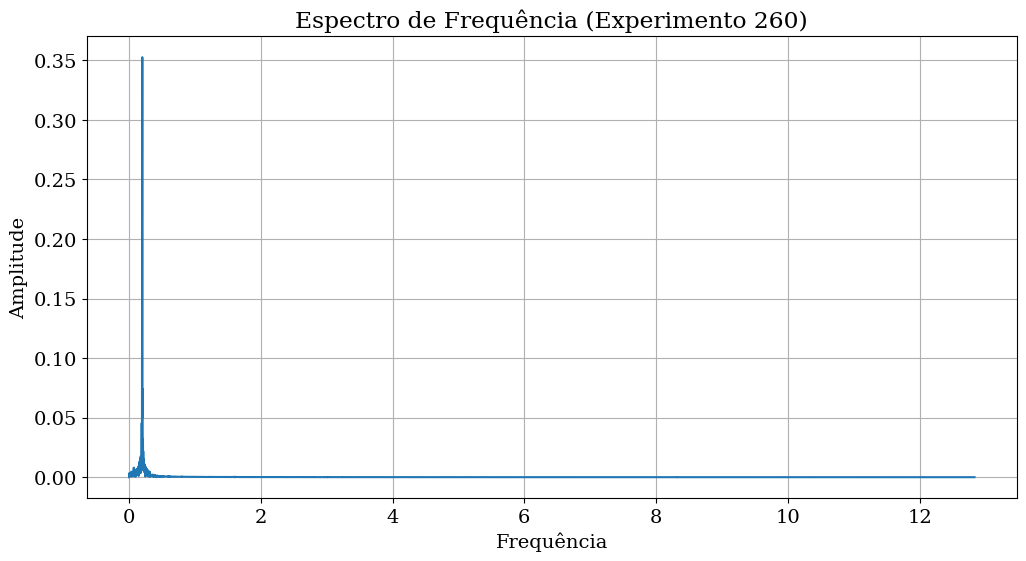

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Escolha qual experimento analisar (índice da linha)
exp_idx = 0  # Vamos analisar o primeiro experimento (mudar para qualquer índice de 0 a 29 para novas análises)

# Extrai o sinal e o tempo para o experimento selecionado
t = T[exp_idx, :]  # Tempo
y = Y[exp_idx, :]  # Sinal de deslocamento

# Calcula o intervalo de tempo entre amostras
dt = t[1] - t[0]  # Assume-se que o tempo é uniformemente amostrado

# Número de pontos do sinal
N = len(y)

# Calcula a FFT
yf = fft(y)
xf = fftfreq(N, dt)[:N//2]  # Frequências positivas

# Plot do espectro de amplitude
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title(f'Espectro de Frequência (Experimento {train_idxs[exp_idx]})')
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

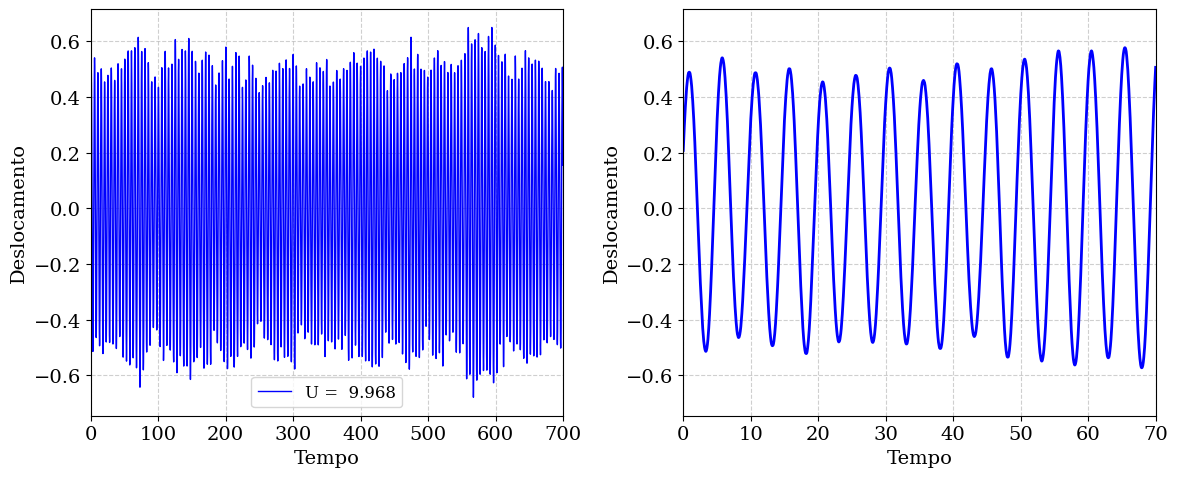

In [6]:
# Criar a figura com dois subplots lado a lado
plt.figure(figsize=(12, 5))
exp_idx = 0

# Gráfico 1 - Sinal completo
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
plt.plot(T[exp_idx,:], Y[exp_idx,:], 'b-', linewidth=1, label=f'U =  {np.round(U[exp_idx],3)}')
plt.xlabel('Tempo')
plt.ylabel('Deslocamento')
#plt.title('Full Signal (0-700s)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xlim(0, 700)  # Garante que o eixo x vai até 700s

# Gráfico 2 - Zoom na região inicial
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
plt.plot(t, y, 'b-', linewidth=2, label=f'Experiment {train_idxs[exp_idx]} (Zoom)')
plt.xlabel('Tempo')
plt.ylabel('Deslocamento')
#plt.title('Zoomed View (0-70s)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
#plt.legend(fontsize=10)
plt.xlim(0, 70)  # Limita a visualização aos primeiros 70s

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

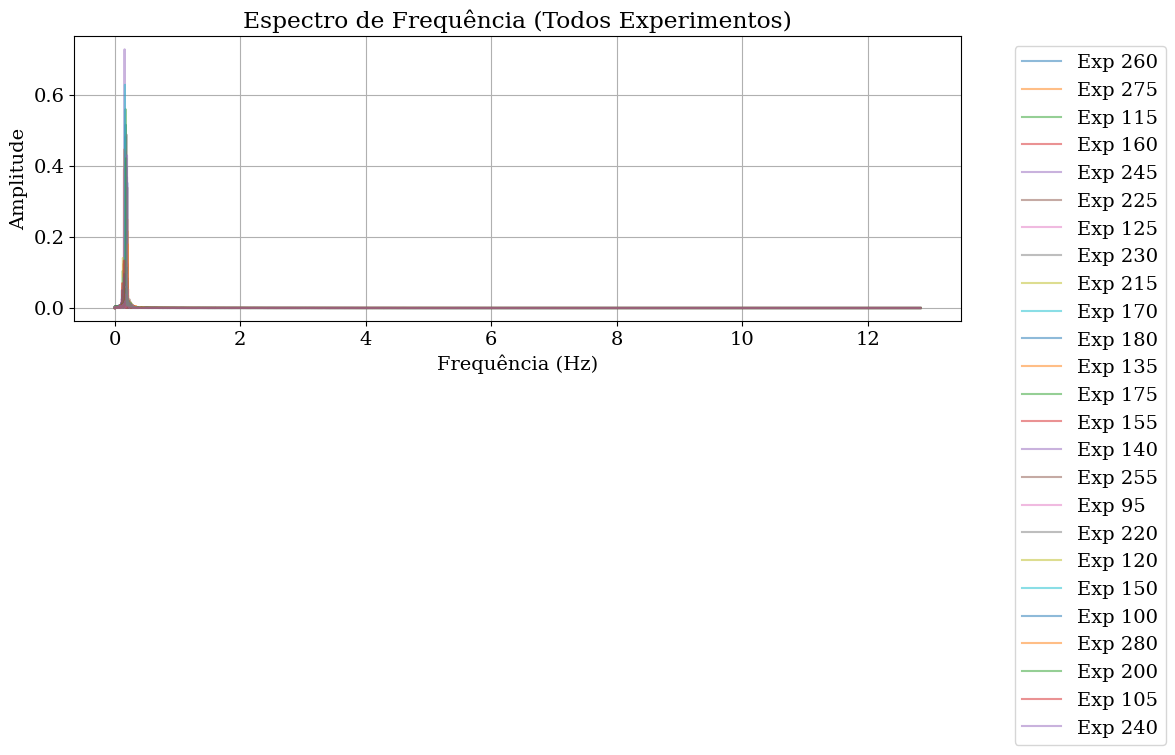

In [7]:
plt.figure(figsize=(12, 6))

for exp_idx in range(Y.shape[0]):
    t = T[exp_idx, :]
    y = Y[exp_idx, :]
    dt = t[1] - t[0]
    N = len(y)

    yf = fft(y)
    xf = fftfreq(N, dt)[:N//2]

    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), alpha=0.5, label=f'Exp {train_idxs[exp_idx]}')

plt.title('Espectro de Frequência (Todos Experimentos)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


=== Resultados ===
Média das frequências máximas: 0.19 Hz
Total de sinais válidos: 25/25


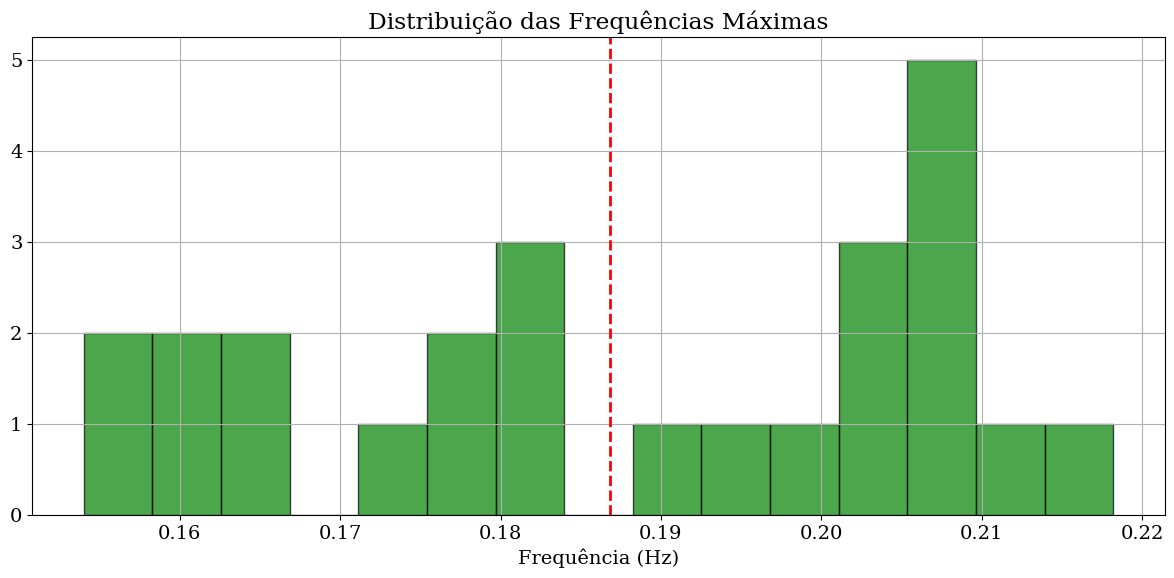

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

def calculate_frequency_stats(T, Y, min_height=0.1):
    """
    Calcula estatísticas de frequência para múltiplos sinais.

    Args:
        T: Array de tempos (shape [n_sinais, n_amostras])
        Y: Array de sinais (shape [n_sinais, n_amostras])
        min_height: Limite mínimo para detecção de picos (0 a 1)

    Returns:
        (avg_min, avg_max): Média dos mínimos e média dos máximos
        min_freqs: Lista de frequências mínimas por sinal
        max_freqs: Lista de frequências máximas por sinal
    """
    n_signals = Y.shape[0]
    min_freqs = []
    max_freqs = []

    for i in range(n_signals):
        # Calcula FFT
        t = T[i, :]
        y = Y[i, :]
        dt = t[1] - t[0]
        N = len(y)

        yf = fft(y)
        xf = fftfreq(N, dt)[:N//2]
        spectrum = 2.0/N * np.abs(yf[0:N//2])

        # Detecta picos significativos
        peaks, _ = find_peaks(spectrum, height=min_height*np.max(spectrum))

        if len(peaks) > 0:
            freqs = xf[peaks]
            min_freqs.append(np.min(freqs))
            max_freqs.append(np.max(freqs))
        else:
            print(f"Aviso: Nenhum pico encontrado no sinal {i+1}")

    # Calcula médias
    avg_min = np.mean(min_freqs) if min_freqs else np.nan
    avg_max = np.mean(max_freqs) if max_freqs else np.nan

    return (avg_min, avg_max), min_freqs, max_freqs

# Uso do código
(avg_min, avg_max), min_freqs, max_freqs = calculate_frequency_stats(T, Y)

print("\n=== Resultados ===")
print(f"Média das frequências máximas: {avg_max:.2f} Hz")
print(f"Total de sinais válidos: {len(min_freqs)}/{Y.shape[0]}")

# Plot dos resultados
plt.figure(figsize=(12, 6))

plt.hist(max_freqs, bins=15, alpha=0.7, color='green', edgecolor='black')
plt.axvline(avg_max, color='red', linestyle='--', linewidth=2)
plt.title('Distribuição das Frequências Máximas')
plt.xlabel('Frequência (Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

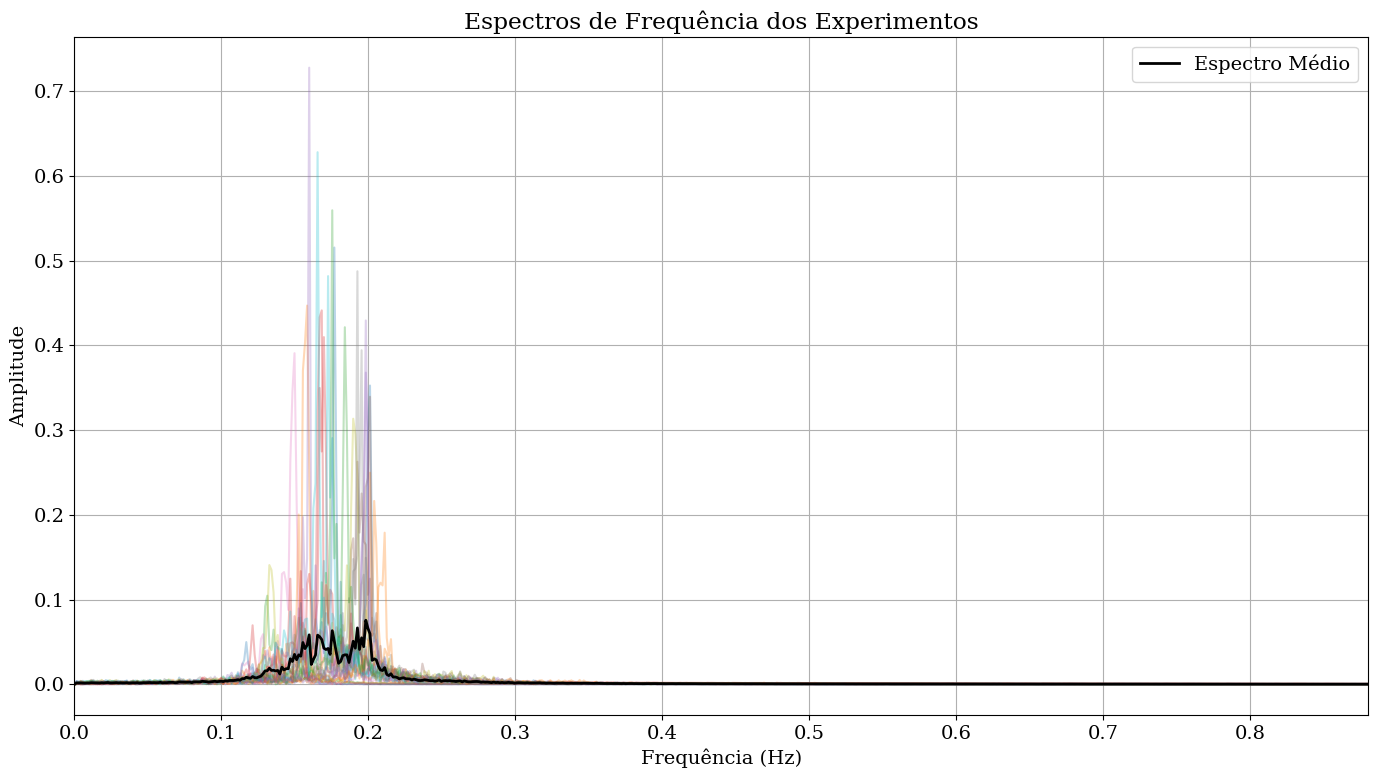

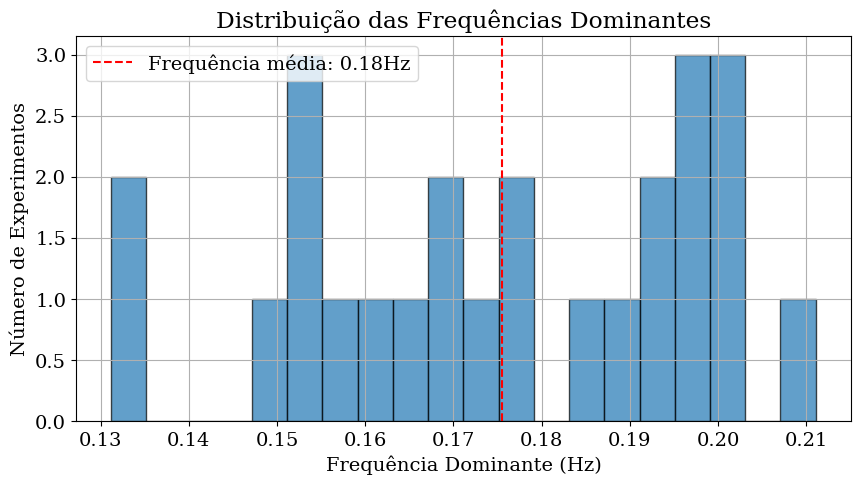


=== Resultados Sumarizados ===
Faixa de análise: 0-0.8 Hz
Frequência dominante média: 0.18 Hz
Frequência dominante do espectro médio: 0.20 Hz
Desvio padrão: 0.02 Hz

Sugestão para frequência de corte do filtro: 0.35 Hz


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

def analyze_dominant_frequencies(T, Y, train_idxs, min_freq=0.5, max_freq=50):
    """
    Analisa e retorna a frequência dominante média de todos os experimentos.

    Args:
        T: Array de tempos para todos os experimentos (shape [n_experiments, n_points])
        Y: Array de sinais para todos os experimentos
        train_idxs: Índices dos experimentos
        min_freq: Frequência mínima a considerar (Hz) - padrão 0.5Hz
        max_freq: Frequência máxima a considerar (Hz) - padrão 50Hz

    Returns:
        mean_freq: Frequência dominante média (Hz)
        detailed_results: Dicionário com resultados detalhados por experimento
        freq_spectrum: Espectro de frequência médio
    """
    n_experiments = Y.shape[0]
    dominant_freqs = []
    all_spectra = []

    detailed_results = {}

    plt.figure(figsize=(14, 8))

    for exp_idx in range(n_experiments):
        t = T[exp_idx, :]
        y = Y[exp_idx, :]
        dt = t[1] - t[0]
        fs = 1/dt  # Frequência de amostragem

        # Verifica se as frequências máximas são válidas
        if max_freq > fs/2:
            max_freq = fs/2 * 0.9  # Evita a frequência de Nyquist
            print(f"Aviso: max_freq ajustada para {max_freq:.2f} Hz (metade da frequência de amostragem)")

        # Calcula FFT
        N = len(y)
        yf = fft(y)
        xf = fftfreq(N, dt)[:N//2]
        spectrum = 2.0/N * np.abs(yf[0:N//2])
        all_spectra.append(spectrum)

        # Filtra frequências dentro do range de interesse
        valid_freqs = (xf >= min_freq) & (xf <= max_freq)
        xf_filtered = xf[valid_freqs]
        spectrum_filtered = spectrum[valid_freqs]

        # Encontra picos no espectro filtrado
        peaks, _ = find_peaks(spectrum_filtered, height=0.2*np.max(spectrum_filtered))

        if len(peaks) > 0:
            dominant_idx = peaks[np.argmax(spectrum_filtered[peaks])]
            dominant_freq = xf_filtered[dominant_idx]
        else:
            dominant_freq = np.nan
            print(f"Aviso: Nenhum pico encontrado para o experimento {train_idxs[exp_idx]} na faixa {min_freq}-{max_freq}Hz")

        dominant_freqs.append(dominant_freq)

        # Armazena resultados detalhados
        detailed_results[train_idxs[exp_idx]] = {
            'dominant_freq': dominant_freq,
            'spectrum_x': xf,
            'spectrum_y': spectrum,
            'fs': fs
        }

        # Plot do espectro individual (linhas transparentes)
        plt.plot(xf, spectrum, alpha=0.3)

    # Calcula espectro médio
    mean_spectrum = np.mean(np.array(all_spectra), axis=0)

    # Plot do espectro médio
    plt.plot(xf, mean_spectrum, 'k-', linewidth=2, label='Espectro Médio')
    #plt.axvline(min_freq, color='r', linestyle=':', label=f'min_freq = {min_freq}Hz')
    #plt.axvline(max_freq, color='b', linestyle=':', label=f'max_freq = {max_freq}Hz')

    # Configuração do plot
    plt.title('Espectros de Frequência dos Experimentos')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, max_freq*1.1])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Filtra frequências válidas para cálculo da média
    valid_freqs = [f for f in dominant_freqs if not np.isnan(f)]

    if len(valid_freqs) == 0:
        raise ValueError("Nenhuma frequência dominante válida foi encontrada na faixa especificada")

    mean_freq = np.mean(valid_freqs)

    # Plot da distribuição das frequências dominantes
    plt.figure(figsize=(10, 5))
    plt.hist(valid_freqs, bins=20, alpha=0.7, edgecolor='black')
    plt.axvline(mean_freq, color='r', linestyle='--',
                label=f'Frequência média: {mean_freq:.2f}Hz')
    plt.title('Distribuição das Frequências Dominantes')
    plt.xlabel('Frequência Dominante (Hz)')
    plt.ylabel('Número de Experimentos')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Identificação do pico no espectro médio na faixa de interesse
    valid_mask = (xf >= min_freq) & (xf <= max_freq)
    dominant_idx_mean = np.argmax(mean_spectrum[valid_mask])
    dominant_freq_mean = xf[valid_mask][dominant_idx_mean]

    print("\n=== Resultados Sumarizados ===")
    print(f"Faixa de análise: {min_freq}-{max_freq} Hz")
    print(f"Frequência dominante média: {mean_freq:.2f} Hz")
    print(f"Frequência dominante do espectro médio: {dominant_freq_mean:.2f} Hz")
    print(f"Desvio padrão: {np.std(valid_freqs):.2f} Hz")

    return mean_freq, detailed_results, mean_spectrum

# Definindo os parâmetros de frequência (ajuste conforme necessário)
min_frequency = 0 # Frequência mínima de interesse (Hz)
max_frequency = 0.8  # Frequência máxima de interesse (Hz)
#max_frequency = avg_max

# Executa a análise para todos os experimentos
try:
    mean_freq, detailed_results, mean_spectrum = analyze_dominant_frequencies(
        T, Y, train_idxs, min_freq=min_frequency, max_freq=max_frequency)

    # Exemplo de como usar os resultados para um filtro
    cutoff_freq = 2 * mean_freq  # Frequência de corte para um filtro passa-baixa
    print(f"\nSugestão para frequência de corte do filtro: {cutoff_freq:.2f} Hz")

except ValueError as e:
    print(f"Erro: {str(e)}")
    print("Sugestão: ajuste os valores de min_freq e max_freq")

In [10]:
import numpy as np

partes = 10
Y_split = np.split(Y, partes, axis=1)  # Divide ao longo das colunas

# Verificando
print(len(Y_split))  # Saída: 10 (cada parte tem shape (30, 18000))
print(Y_split[0].shape)

10
(25, 1800)


In [11]:
from scipy.signal import butter, filtfilt
import numpy as np

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff, btype='low', fs=fs, analog=False)
    y = filtfilt(b, a, data)
    return y

# Parâmetros
cutoff = 0.8
order = 4
n_train = len(train_idxs)

# Listas para armazenar os resultados de cada parte
Y_pd_parts = []
Y_sd_parts = []
Y_filtered_parts = []
Y_pd_filtered_parts = []
Y_sd_filtered_parts = []

# Loop sobre cada parte do Y_split (10 partes)
for part in Y_split:  # part.shape = (30, 18000)
    n_samples, n_points = part.shape

    # Inicializa arrays temporários para esta parte
    Y_pd_part = np.zeros((n_train, n_points))
    Y_sd_part = np.zeros((n_train, n_points))
    Y_filtered_part = np.zeros((n_train, n_points))
    Y_pd_filtered_part = np.zeros((n_train, n_points))
    Y_sd_filtered_part = np.zeros((n_train, n_points))

    for i in range(n_train):
        t = T[i, :n_points]
        y = part[i, :]
        fs = 1 / (t[1] - t[0])

        # Filtro no sinal original
        y_filtered = butter_lowpass_filter(y, cutoff, fs, order)

        # Primeira derivada
        y_pd = np.gradient(y, t)
        y_filtered_pd_pre = np.gradient(y_filtered, t)
        y_filtered_pd = butter_lowpass_filter(y_filtered_pd_pre, cutoff, fs, order)

        # Segunda derivada
        y_sd = np.gradient(y_pd, t)
        y_filtered_sd_pre = np.gradient(y_filtered_pd, t)
        y_filtered_sd = butter_lowpass_filter(y_filtered_sd_pre, cutoff, fs, order)

        # Armazenamento dos resultados da parte atual
        Y_pd_part[i, :] = y_pd
        Y_sd_part[i, :] = y_sd
        Y_filtered_part[i, :] = y_filtered
        Y_pd_filtered_part[i, :] = y_filtered_pd
        Y_sd_filtered_part[i, :] = y_filtered_sd

    # Adiciona os resultados desta parte às listas
    Y_pd_parts.append(Y_pd_part)
    Y_sd_parts.append(Y_sd_part)
    Y_filtered_parts.append(Y_filtered_part)
    Y_pd_filtered_parts.append(Y_pd_filtered_part)
    Y_sd_filtered_parts.append(Y_sd_filtered_part)

# Concatena todas as partes ao longo do eixo das colunas (axis=1)
Y_pd = np.concatenate(Y_pd_parts, axis=1)
Y_sd = np.concatenate(Y_sd_parts, axis=1)
Y_filtered = np.concatenate(Y_filtered_parts, axis=1)
Y_pd_filtered = np.concatenate(Y_pd_filtered_parts, axis=1)
Y_sd_filtered = np.concatenate(Y_sd_filtered_parts, axis=1)

# Verificação dos shapes (deve retornar (n_train, 180000))
print(Y_pd.shape, Y_sd.shape, Y_filtered.shape)

#Utilizando a Eq de OM para encontrar o q

# Coeficientes da equação
Xi_y = 0.007
m_o = 2.6
Ca_pot = 1
q_hat = 2
C_dv = 1.1856
C_0l = 0.3842
St = 0.1932
c = C_0l/q_hat

# Lista para armazenar as partes de Q
Q_parts = []

# Loop sobre cada parte do Y_split (10 partes)
for part_idx, part in enumerate(Y_split):  # part.shape = (30, 18000)
    n_points = part.shape[1]
    Q_part = np.zeros((n_train, n_points))

    for i in range(n_train):
        # Pegamos apenas a parte correspondente dos arrays filtrados

        # com filtro
        y = Y_filtered_parts[part_idx][i, :]
        y_pd = Y_pd_filtered_parts[part_idx][i, :]
        y_sd = Y_sd_filtered_parts[part_idx][i, :]

        # sem filtro
        #y = Y_split[part_idx][i, :]
        #y_pd = Y_pd_parts[part_idx][i, :]
        #y_sd = Y_sd_parts[part_idx][i, :]

        # Pegamos o tempo correspondente a esta parte
        t_part = T[i, part_idx*n_points:(part_idx+1)*n_points]

        Ur = U[i]
        S = St*Ur

        # 3ª coluna (índice 2)
        # Parâmetros da equação
        a = y_sd + 2*Xi_y*y_pd + y  # Coeficiente de y'
        b = (1/(2*np.pi**3))*(Ur**2/(m_o+Ca_pot))  # Coeficiente do lado direito
        d = 2*np.pi*C_dv*y_pd/Ur  # Coeficiente de y'' no lado direito
        e = np.sqrt(1 + (2*np.pi*y_pd/Ur)**2)

        # Cálculo de q usando a equação rearranjada de OM
        Q_part[i, :] = (a/b + e*d)/(e*c)

    Q_parts.append(Q_part)

# Concatena todas as partes de Q
Q = np.concatenate(Q_parts, axis=1)

# Intervalo de tempo (usando a primeira parte como referência)
t_span = [T[0, 0], T[0, -1]]  # Tempo de 0 a 700 segundos
cutoff = 0.4

# Listas para armazenar as partes dos resultados
Q_pd_parts = []
Q_sd_parts = []
Q_filtered_parts = []
Q_pd_filtered_parts = []
Q_sd_filtered_parts = []

# Loop sobre cada parte de Q (10 partes)
for part_idx in range(len(Q_parts)):  # Q_parts contém as 10 partes de Q
    n_points = Q_parts[part_idx].shape[1]  # 18000

    # Inicializa arrays temporários para esta parte
    Q_pd_part = np.zeros((n_train, n_points))
    Q_sd_part = np.zeros((n_train, n_points))
    Q_filtered_part = np.zeros((n_train, n_points))
    Q_pd_filtered_part = np.zeros((n_train, n_points))
    Q_sd_filtered_part = np.zeros((n_train, n_points))

    for i in range(n_train):
        # Pega o tempo correspondente a esta parte
        t_part = T[i, part_idx*n_points:(part_idx+1)*n_points]
        q = Q_parts[part_idx][i, :]
        fs = 1/(t_part[1] - t_part[0])

        # Filtro no sinal original
        q_filtered = butter_lowpass_filter(q, cutoff, fs, order)

        # Primeira derivada
        q_pd = np.gradient(q, t_part)
        q_filtered_pd_pre = np.gradient(q_filtered, t_part)
        q_filtered_pd = butter_lowpass_filter(q_filtered_pd_pre, cutoff, fs, order)

        # Segunda derivada
        q_sd = np.gradient(q_pd, t_part)
        q_filtered_sd_pre = np.gradient(q_filtered_pd, t_part)
        q_filtered_sd = butter_lowpass_filter(q_filtered_sd_pre, cutoff, fs, order)

        # Armazena os resultados da parte atual
        Q_pd_part[i, :] = q_pd
        Q_sd_part[i, :] = q_sd
        Q_filtered_part[i, :] = q_filtered
        Q_pd_filtered_part[i, :] = q_filtered_pd
        Q_sd_filtered_part[i, :] = q_filtered_sd

    # Adiciona os resultados desta parte às listas
    Q_pd_parts.append(Q_pd_part)
    Q_sd_parts.append(Q_sd_part)
    Q_filtered_parts.append(Q_filtered_part)
    Q_pd_filtered_parts.append(Q_pd_filtered_part)
    Q_sd_filtered_parts.append(Q_sd_filtered_part)

# Concatena todas as partes ao longo do eixo das colunas (axis=1)
Q_pd = np.concatenate(Q_pd_parts, axis=1)
Q_sd = np.concatenate(Q_sd_parts, axis=1)
Q_filtered = np.concatenate(Q_filtered_parts, axis=1)
Q_pd_filtered = np.concatenate(Q_pd_filtered_parts, axis=1)
Q_sd_filtered = np.concatenate(Q_sd_filtered_parts, axis=1)

# Verificação dos shapes (deve retornar (n_train, 180000))
print(Q_pd.shape, Q_sd.shape, Q_filtered.shape)

(25, 18000) (25, 18000) (25, 18000)
(25, 18000) (25, 18000) (25, 18000)


In [12]:
len(t_part)
t = np.linspace(0, t_part[-1]-t_part[0], 1800)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/t_part.npy', t)


In [13]:
from scipy.integrate import solve_ivp
from scipy.optimize import brute
from scipy import optimize

def trainSystem(t, X, i, Aeps):

    S = St*U[i]
    Ur = U[i]

    A, eps = Aeps

    y, y_pd, q, q_pd = X  # Desempacotar as variáveis

    if abs(y + y_pd+ q+q_pd) > 1000:
      raise(ValueError("q_pd > 100"))

    b = (1/(2*np.pi**3))*(Ur**2/(m_o+Ca_pot))
    d = 2*np.pi*C_dv*y_pd/Ur # Coeficiente de y'' no lado direito
    e = np.sqrt(1+(2*np.pi*y_pd/Ur)**2)

    y_sd = - y - 2*Xi_y*y_pd + b*((q*c - d)*e)
    q_sd = - eps * S * (q**2 - 1) * q_pd - S**2 * q + A * y_sd  # Segunda derivada de q

    return [y_pd, y_sd, q_pd, q_sd]


def calculate_prediction(Aeps, i, part_idx):

  x0 = [Y_filtered_parts[part_idx][i, 0], Y_pd_filtered_parts[part_idx][i, 0], Q_filtered_parts[part_idx][i, 0], Q_pd_filtered_parts[part_idx][i, 0]]
  y, y_pd, q, q_pd = solve_ivp(trainSystem, [t[0], t[-1]], y0 = x0, args=(i, Aeps), t_eval=t, dense_output=True).sol(t)

  return y, q


def loss_rms(Aeps, i, y, part_idx):
  try:
    return (np.mean((calculate_prediction(Aeps, i, part_idx)[0]**2)) - np.mean(y**2))**2
  except ValueError:
    # print("High value detected")
    return 1000

In [14]:
Y_filtered_parts[1].shape

(25, 1800)

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

Ag = np.linspace(0, 15, 100)
epsg = np.linspace(0.03, 1.5, 150)

Ag, epsg = np.meshgrid(Ag, epsg)
loss_surface1 = np.zeros((n_train, Ag.shape[0], Ag.shape[1]))
loss_surface2 = np.zeros((n_train, Ag.shape[0], Ag.shape[1]))
loss_surface3 = np.zeros((n_train, Ag.shape[0], Ag.shape[1]))
loss_surface4 = np.zeros((n_train, Ag.shape[0], Ag.shape[1]))


for i in range(1):
    print(i, U[i])
    y = Y_filtered_parts[0][i, :]
    q = Q_filtered_parts[0][i, :]
    for j in tqdm(range(Ag.shape[0])):
        for k in range(Ag.shape[1]):
            A = Ag[j, k]
            eps = epsg[j, k]
            try:
                predicted_y, predicted_q = calculate_prediction((A, eps), i, 0)
                loss_surface1[i, j, k] = np.mean((predicted_y - y)**2)
                loss_surface2[i, j, k] = np.mean((predicted_q - q)**2)
                loss_surface3[i, j, k] = (np.mean(predicted_y**2) - np.mean(y**2))**2
                loss_surface4[i, j, k] = (np.mean(predicted_q**2) - np.mean(q**2))**2

            except ValueError:
                #print("High value detected")
                loss_surface1[i, j, k] = 1000
                loss_surface2[i, j, k] = 1000
                loss_surface3[i, j, k] = 1000
                loss_surface4[i, j, k] = 1000
                pass





0 9.967837091935769


  1%|          | 1/150 [00:03<08:05,  3.26s/it]


KeyboardInterrupt: 

In [ ]:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=loss_surface3[0], x=Ag, y=epsg)])
fig.update_layout(title='Loss Surface for Training Data 0',
                  scene = dict(
                      xaxis_title='A',
                      yaxis_title='epsilon',
                      zaxis_title='Loss',
                      zaxis = dict(range=[0, .03])),

                  autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

fig = go.Figure(data=[go.Surface(z=loss_surface4[0], x=Ag, y=epsg)])
fig.update_layout(title='Loss Surface for Training Data 1',
                  scene = dict(
                      xaxis_title='A',
                      yaxis_title='epsilon',
                      zaxis_title='Loss'),
                  autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()


In [16]:
from scipy.optimize import least_squares
import numpy as np

# Número de partes (10)
n_parts = len(Y_split)

# Arrays para armazenar A e eps de cada parte (shape: (n_parts, n_train))
A_parts = np.zeros((n_parts, n_train))
eps_parts = np.zeros((n_parts, n_train))
#A_parts_rms = np.zeros((n_parts, n_train))
#eps_parts_rms = np.zeros((n_parts, n_train))

# Parâmetros iniciais e limites para otimização
initial_guess = [0.3, 8]  # Chute inicial para [eps, A]
bounds = [(0, 15), (-0.2, 2)]  # Limites para [A, eps]

# Loop sobre cada parte (10 partes)
for part_idx in range(n_parts):
    #print(f"\n\n\nParte {part_idx+1}")
    # Pega os dados correspondentes a esta parte

    # com filtro
    q_part = Q_filtered_parts[part_idx]  # shape: (n_train, 18000)
    q_pd_part = Q_pd_filtered_parts[part_idx]
    q_sd_part = Q_sd_filtered_parts[part_idx]
    y_sd_part = Y_sd_filtered_parts[part_idx]
    y_part = Y_filtered_parts[part_idx]

    # sem filtro
    #q_part = Q_parts[part_idx]
    #q_pd_part = Q_pd_parts[part_idx]
    #q_sd_part = Q_sd_parts[part_idx]
    #y_sd_part = Y_sd_parts[part_idx]

    # Loop sobre cada linha (n_train linhas)
    for i in range(n_train):
        #print(f"\nAmostra {i+1}\nUr: {U[i]}")

        q = q_part[i, :]
        q_pd = q_pd_part[i, :]
        q_sd = q_sd_part[i, :]
        y_sd = y_sd_part[i, :]
        y = y_part[i, :]
        S = St * U[i]  # U deve ter shape (n_train,)

        # Otimização com least squares linear solution
        lhs = q_sd + S**2 * q
        rhs = np.vstack((S * (1 - q**2) * q_pd, y_sd)).T
        theta, residuals, rank, s = np.linalg.lstsq(rhs, lhs, rcond=None)
        A_parts[part_idx, i] = theta[1]
        eps_parts[part_idx, i] = theta[0] / S
        #print(f"A: {A_parts[part_idx, i]}, eps: {eps_parts[part_idx, i]}")

        # Função de resíduos
        #residuals = lambda x: q_sd + x[0]*S*(q**2 - 1)*q_pd + S**2*q - x[1]*y_sd

        # Otimização com least_squares
        #res = least_squares(residuals, initial_guess, method="lm")
        #eps_min, A_min = res.x

        # Armazena os resultados desta parte
        #eps_parts[part_idx, i] = eps_min
        #A_parts[part_idx, i] = A_min


        # Otimização por rms por força bruta
        #loss2 = lambda x: loss_rms(x, i, y, part_idx)
        #res_2, fval, _, _ = brute(loss2,  bounds, full_output=True, Ns=40)
        #A_min, eps_min = res_2

        # Armazena os resultados desta parte
        #eps_parts_rms[part_idx, i] = eps_min
        #A_parts_rms[part_idx, i] = A_min
        #print(f"A_rms: {A_parts_rms[part_idx, i]}, eps_rms: {eps_parts_rms[part_idx, i]}")
        #print(f"Difference between rms: {fval}")

        #np.save('/content/drive/MyDrive/A_rms_2_2.npy', A_parts_rms)
        #np.save('/content/drive/MyDrive/eps_rms_2_2.npy', eps_parts_rms)

        #print("A_rms_2 and eps_rms_2 succesfully saved.")


# Agora você tem:
# - eps_parts: array de shape (10, n_train) contendo os epsilons de cada parte
# - A_parts: array de shape (10, n_train) contendo os A's de cada parte

# Exemplo: A e eps para a primeira linha (i=0) em todas as partes
print("A para a linha 0 nas 10 partes:", A_parts[:, 0])
print("Eps para a linha 0 nas 10 partes:", eps_parts[:, 0])



A para a linha 0 nas 10 partes: [10.3031283   9.81866708  9.70135756  9.70751695  9.83253583  9.96537521
 10.05345186 10.05167073  9.9750083   9.89760051]
Eps para a linha 0 nas 10 partes: [0.02235551 0.02166391 0.01945187 0.02130013 0.02316549 0.02258127
 0.02208567 0.02106591 0.01725082 0.02177266]


In [17]:
#np.save('/content/drive/MyDrive/n_parts.npy', n_parts)


In [18]:
# save/load A_rms and eps_rms

A_parts_rms = np.load('/content/drive/MyDrive/A_rms.npy')
eps_parts_rms = np.load('/content/drive/MyDrive/eps_rms.npy')

A_parts_rms_2 = np.load('/content/drive/MyDrive/A_rms_2.npy')
eps_parts_rms_2 = np.load('/content/drive/MyDrive/eps_rms_2.npy')

A_parts_rms_2_2 = np.load('/content/drive/MyDrive/A_rms_2_2.npy')
eps_parts_rms_2_2 = np.load('/content/drive/MyDrive/eps_rms_2_2.npy')


In [19]:
A_parts_rms_2[5:,:] = A_parts_rms_2_2[5:,:]
eps_parts_rms_2[5:,:] = eps_parts_rms_2_2[5:,:]

In [20]:
A_parts_rms_2[0,:]

array([12.69051625, 12.31009615,  1.54467516, 12.04850287, 12.30721507,
       12.69230769, 10.74782286, 13.50783502, 13.07709709, 10.47443394,
       12.35790572, 11.28959304,  6.14182692, 14.57227584,  8.90318758,
       12.60387831,  9.22990406, 11.53846154,  8.88794752,  5.03111267,
       12.36117788, 12.69467242,  8.09373973,  5.45160393,  9.60411659])

In [21]:
A_parts_rms = A_parts_rms_2.copy()
eps_parts_rms = eps_parts_rms_2.copy()

In [22]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def polynomial(u, *coefficients):
    """Função polinomial de grau n"""
    return sum(coef * u**i for i, coef in enumerate(coefficients[::-1]))

def fit_train_samples(U, A, eps, train_indices, degreeA=4, degreeEps=4):
    """
    Ajusta curvas polinomiais para as amostras de treino e retorna A_poly e Eps_poly

    """
    # Ajuste para A
    coeff_A, _ = curve_fit(lambda u, *coeff: polynomial(u, *coeff),
                         U[train_indices], A[train_indices],
                         p0=[1]*(degreeA+1))

    # Ajuste para eps
    coeff_eps, _ = curve_fit(lambda u, *coeff: polynomial(u, *coeff),
                           U[train_indices], eps[train_indices],
                           p0=[1]*(degreeEps+1))

    # Calcula valores polinomiais para TODAS as amostras
    A_poly = polynomial(U, *coeff_A)
    Eps_poly = polynomial(U, *coeff_eps)

    return {
        'A_poly': A_poly,
        'Eps_poly': Eps_poly,
        'coefficients_A': coeff_A,
        'coefficients_eps': coeff_eps,
        'A_function': lambda u: polynomial(u, *coeff_A),
        'Eps_function': lambda u: polynomial(u, *coeff_eps)
    }


A = np.mean(A_parts, axis=0)
eps = np.mean(eps_parts, axis=0)

A_rms = np.mean(A_parts_rms, axis=0)
eps_rms = np.mean(eps_parts_rms, axis=0)

A_rms_2 = np.mean(A_parts_rms_2, axis=0)
eps_rms_2 = np.mean(eps_parts_rms_2, axis=0)

sorted_U_idx = np.argsort(U)
U2 = U[sorted_U_idx]
mean_A_across_parts = np.mean(A_parts, axis=0)[sorted_U_idx]
std_A_across_parts = np.std(A_parts, axis=0)[sorted_U_idx]
mean_eps_across_parts = np.mean(eps_parts, axis=0)[sorted_U_idx]
std_eps_across_parts = np.std(eps_parts, axis=0)[sorted_U_idx]

mean_A_rms_across_parts = np.mean(A_parts_rms, axis=0)[sorted_U_idx]
std_A_rms_across_parts = np.std(A_parts_rms, axis=0)[sorted_U_idx]
mean_eps_rms_across_parts = np.mean(eps_parts_rms, axis=0)[sorted_U_idx]
std_eps_rms_across_parts = np.std(eps_parts_rms, axis=0)[sorted_U_idx]

mean_A_rms_across_parts_2 = np.mean(A_parts_rms_2, axis=0)[sorted_U_idx]
std_A_rms_across_parts_2 = np.std(A_parts_rms_2, axis=0)[sorted_U_idx]
mean_eps_rms_across_parts_2 = np.mean(eps_parts_rms_2, axis=0)[sorted_U_idx]
std_eps_rms_across_parts_2 = np.std(eps_parts_rms_2, axis=0)[sorted_U_idx]


# Ajuste do modelo
results_sorted = fit_train_samples(U2, mean_A_across_parts, mean_eps_across_parts, range(25), degreeA=8, degreeEps=8)
results_rms = fit_train_samples(U2, mean_A_rms_across_parts, mean_eps_rms_across_parts, range(25), degreeA=4, degreeEps=4)
results_sorted_2 = fit_train_samples(U2, mean_A_rms_across_parts_2, mean_eps_rms_across_parts_2, range(25), degreeA=4, degreeEps=4)

# Ajuste do modelo
results = fit_train_samples(U, A, eps, range(25), degreeA=8, degreeEps=8)
results_rms = fit_train_samples(U, A_rms, eps_rms, range(25), degreeA=8, degreeEps=8)
results_rms_2 = fit_train_samples(U, A_rms_2, eps_rms_2, range(25), degreeA=8, degreeEps=8)

# Acessando os resultados
A_poly = results['A_poly']  # Valores polinomiais de A para todas as amostras
Eps_poly = results['Eps_poly']  # Valores polinomiais de eps para todas as amostras

A_poly_rms = results_rms['A_poly']  # Valores polinomiais de A para todas as amostras
Eps_poly_rms = results_rms['Eps_poly']  # Valores polinomiais de eps para todas as amostras

A_poly_rms_2 = results_rms_2['A_poly']  # Valores polinomiais de A para todas as amostras
Eps_poly_rms_2 = results_rms_2['Eps_poly']

# Exibindo os primeiros valores
print("\nPrimeiros valores de A_poly:")
print(A_poly[:5])
print("\nPrimeiros valores de Eps_poly:")
print(Eps_poly[:5])


Primeiros valores de A_poly:
[ 9.91821129e+00  1.08328793e+01 -2.70380999e-03  7.76205004e-01
  8.70771396e+00]

Primeiros valores de Eps_poly:
[0.02346739 0.02919857 0.00428267 0.00413963 0.01452612]


In [23]:
results['coefficients_eps']

array([ 7.60904509e-06, -4.68959132e-04,  1.24369932e-02, -1.85297651e-01,
        1.69582911e+00, -9.76051661e+00,  3.45006289e+01, -6.84814204e+01,
        5.84594878e+01])

In [24]:
results['coefficients_A']

array([-4.19121483e-04,  2.47750015e-02, -6.30642139e-01,  9.01438378e+00,
       -7.89912211e+01,  4.33498259e+02, -1.45021186e+03,  2.69245435e+03,
       -2.11352764e+03])

In [25]:
results['coefficients_A']

Uplot = np.linspace(3.5, 11, 100)
coeff_A = results['coefficients_A']
coeff_eps = results['coefficients_eps']

Aplot = polynomial(Uplot, *coeff_A)
Epsplot = polynomial(Uplot, *coeff_eps)

coeff_A_rms = results_rms['coefficients_A']
coeff_eps_rms = results_rms['coefficients_eps']

coeff_A_rms_2 = results_rms_2['coefficients_A']
coeff_eps_rms_2 = results_rms_2['coefficients_eps']

Aplot_rms = polynomial(Uplot, *coeff_A_rms)
Epsplot_rms = polynomial(Uplot, *coeff_eps_rms)

Aplot_rms_2 = polynomial(Uplot, *coeff_A_rms_2)
Epsplot_rms_2 = polynomial(Uplot, *coeff_eps_rms_2)

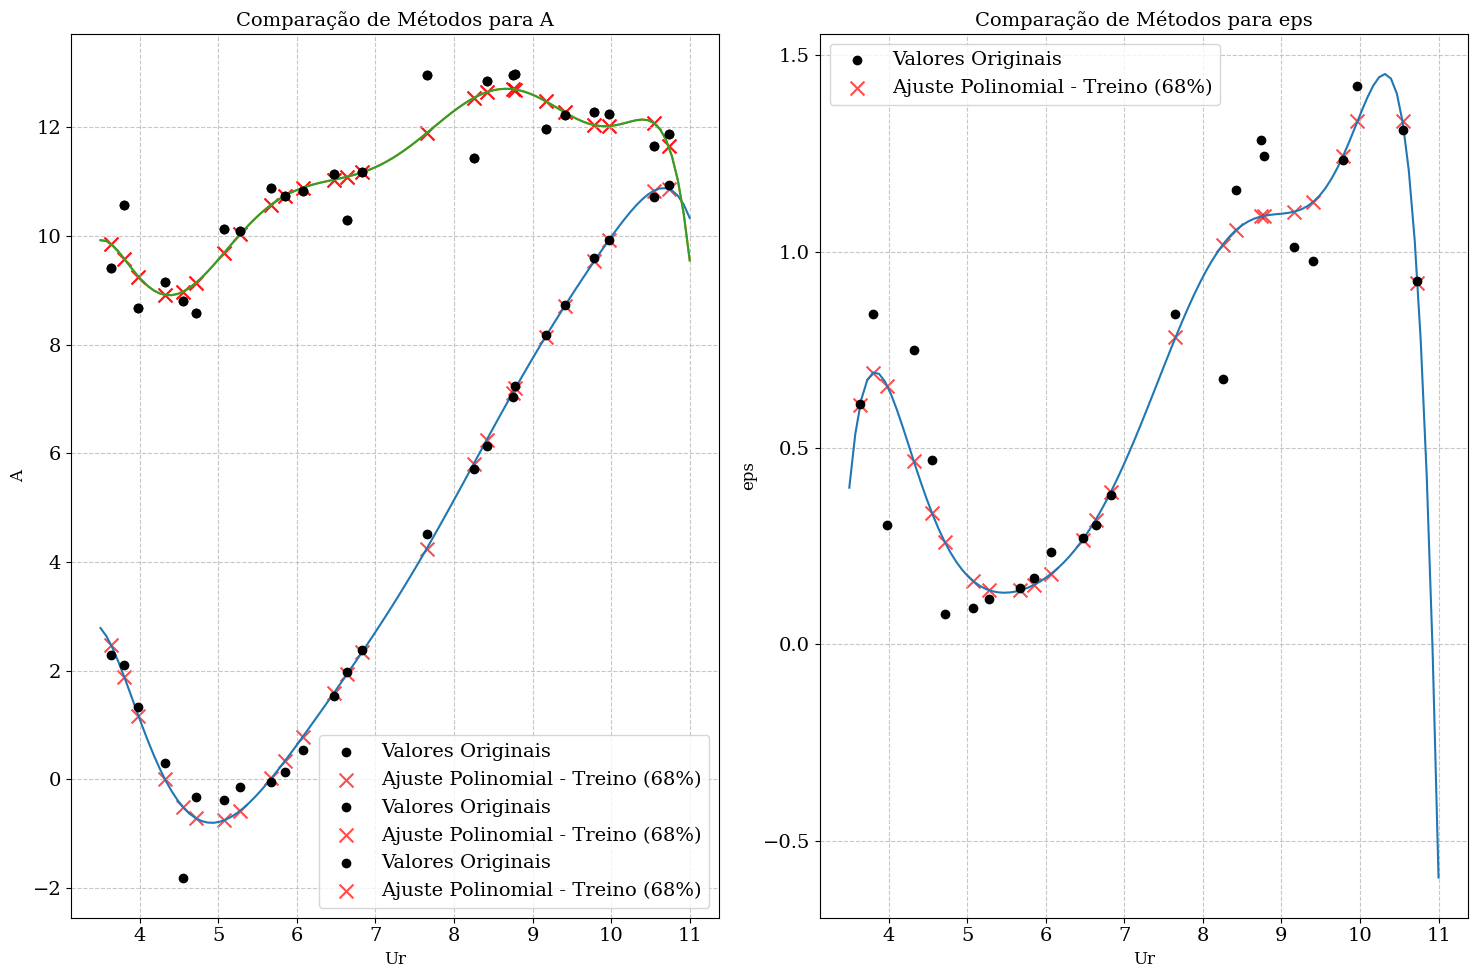


Tabela Comparativa com Erros:
          Ur  A_original    A_poly  Erro_A_poly  eps_original  Eps_poly  \
0   3.637332    2.281098  9.918211     7.637113      0.065216  0.023467   
1   3.803900    2.095421 10.832879     8.737459      0.030623  0.029199   
2   3.982342    1.326877 -0.002704     1.329580      0.017010  0.004283   
3   4.321557    0.289550  0.776205     0.486655      0.006443  0.004140   
4   4.554057   -1.810153  8.707714    10.517867      0.003588  0.014526   
5   4.715861   -0.332600  7.108510     7.441111      0.003380  0.009274   
6   5.071982   -0.383848 -0.720404     0.336556      0.003303  0.003524   
7   5.277978   -0.140197  7.193445     7.333641      0.005034  0.009364   
8   5.672649   -0.060027  5.810224     5.870250      0.003321  0.009272   
9   5.850781    0.140224  1.588982     1.448759      0.003857  0.005121   
10  6.071972    0.537743  2.339047     1.801303      0.003849  0.006801   
11  6.471379    1.530516 -0.757775     2.288291      0.007168  0.0045

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# =====================================
# 5. Geração dos Gráficos Comparativos
# =====================================
plt.figure(figsize=(15, 10))

# Gráfico para A
plt.subplot(1, 2, 1)
plt.scatter(U2, mean_A_across_parts, color='black', label='Valores Originais', zorder=5)
plt.scatter(U, A_poly, c='red', marker='x', s=100, label='Ajuste Polinomial - Treino (68%)', alpha=0.7)
plt.plot(Uplot, Aplot)

plt.scatter(U2, mean_A_rms_across_parts, color='black', label='Valores Originais', zorder=5)
plt.scatter(U, A_poly_rms, c='red', marker='x', s=100, label='Ajuste Polinomial - Treino (68%)', alpha=0.7)
plt.plot(Uplot, Aplot_rms)

plt.scatter(U2, mean_A_rms_across_parts_2, color='black', label='Valores Originais', zorder=5)
plt.scatter(U, A_poly_rms_2, c='red', marker='x', s=100, label='Ajuste Polinomial - Treino (68%)', alpha=0.7)
plt.plot(Uplot, Aplot_rms_2)


plt.xlabel('Ur', fontsize=12)
plt.ylabel('A', fontsize=12)
#plt.ylim(-8, 15)
plt.title('Comparação de Métodos para A', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico para eps
plt.subplot(1, 2, 2)
#plt.scatter(U2, mean_eps_across_parts, color='black', label='Valores Originais', zorder=5)
#plt.scatter(U, Eps_poly, c='red', marker='x', s=100, label='Ajuste Polinomial - Treino (68%)', alpha=0.7)
#plt.scatter(U2, mean_eps_rms_across_parts, color='black', label='Valores Originais', zorder=5)
#plt.scatter(U, Eps_poly_rms, c='red', marker='x', s=100, label='Ajuste Polinomial - Treino (68%)', alpha=0.7)
plt.scatter(U2, mean_eps_rms_across_parts_2, color='black', label='Valores Originais', zorder=5)
plt.scatter(U, Eps_poly_rms_2, c='red', marker='x', s=100, label='Ajuste Polinomial - Treino (68%)', alpha=0.7)
#plt.plot(Uplot, Epsplot)
#plt.plot(Uplot, Epsplot_rms)
plt.plot(Uplot, Epsplot_rms_2)
plt.xlabel('Ur', fontsize=12)
plt.ylabel('eps', fontsize=12)
#plt.ylim(-0.05, 0.09)
plt.title('Comparação de Métodos para eps', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# =====================================
# 6. Tabela Comparativa com Erros
# =====================================
# Cálculo dos erros
error_A_poly = np.abs(A_poly - mean_A_across_parts)
error_Eps_poly = np.abs(Eps_poly - mean_eps_across_parts)

# Criação da tabela
df = pd.DataFrame({
    'Ur': U2,
    'A_original': mean_A_across_parts,
    'A_poly': A_poly,
    'Erro_A_poly': error_A_poly,
    'eps_original': mean_eps_across_parts,
    'Eps_poly': Eps_poly,
    'Erro_Eps_poly': error_Eps_poly
})

# Formatação da tabela
pd.set_option('display.float_format', '{:.6f}'.format)
print("\nTabela Comparativa com Erros:")
print(df[['Ur', 'A_original', 'A_poly', 'Erro_A_poly',
          'eps_original',  'Eps_poly', 'Erro_Eps_poly']])

# Estatísticas resumidas
print("\nErros Médios:")
print(f"Polinomial   - A: {np.mean(error_A_poly):.6f}, eps: {np.mean(error_Eps_poly):.6f}")


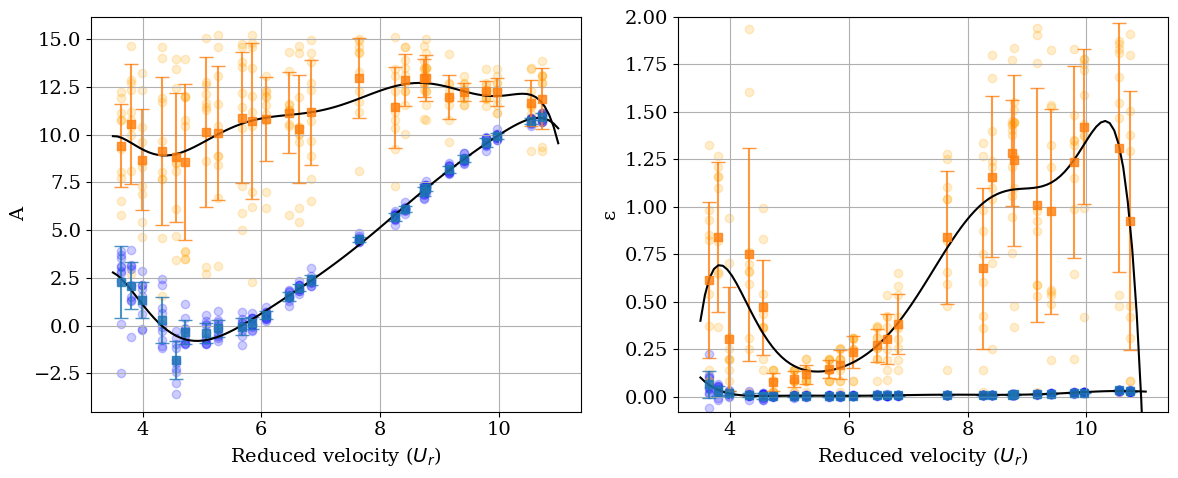

In [27]:
import matplotlib.pyplot as plt
# Change font size globally
plt.rcParams['font.size'] = 14

# Change font family globally
plt.rcParams['font.family'] = 'serif'

# Configurações do plot
plt.figure(figsize=(12, 5))

# Subplot para A vs U
plt.subplot(1, 2, 1)
for part_idx in range(n_parts):
    plt.scatter(U, A_parts[part_idx, :], color='blue', alpha=0.2, label=f'Parte {part_idx+1}')
    plt.scatter(U, A_parts_rms[part_idx, :], alpha=0.2, color='orange', label=f'Parte {part_idx+1}')
    #plt.scatter(U, A_parts_rms_2[part_idx, :], alpha=0.2, color='green', label=f'Parte {part_idx+1}')

plt.errorbar(U2, mean_A_across_parts, yerr=std_A_across_parts, fmt='s', alpha=0.8, capsize=5)
plt.errorbar(U2, mean_A_rms_across_parts, yerr=std_A_rms_across_parts, fmt='s', alpha=0.8, capsize=5)
#plt.errorbar(U2, mean_A_rms_across_parts_2, yerr=std_A_rms_across_parts_2, color='green', fmt='s', alpha=0.8, capsize=5)

plt.plot(Uplot, Aplot, color='black')
plt.plot(Uplot, Aplot_rms, color='black')
#plt.plot(Uplot, Aplot_rms_2, color='black')

plt.xlabel('Reduced velocity ($U_r$)')
plt.ylabel('A')
#plt.title('Parâmetro A vs Velocidade U (10 partes)')
plt.grid(True)
#plt.legend()

# Subplot para eps vs U
plt.subplot(1, 2, 2)
for part_idx in range(n_parts):
    plt.scatter(U, eps_parts[part_idx, :], color='blue', alpha=0.2, label=f'Parte {part_idx+1}')
    plt.scatter(U, eps_parts_rms[part_idx, :], color='orange', alpha=0.2, label=f'Parte {part_idx+1}')
    #plt.scatter(U, eps_parts_rms_2[part_idx, :], color='green', alpha=0.2, label=f'Parte {part_idx+1}')

plt.errorbar(U2, mean_eps_across_parts, yerr=std_eps_across_parts, fmt='s', alpha = 0.8, capsize=5)
plt.errorbar(U2, mean_eps_rms_across_parts, yerr=std_eps_rms_across_parts, fmt='s', alpha = 0.8, capsize=5)
#plt.errorbar(U2, mean_eps_rms_across_parts_2, yerr=std_eps_rms_across_parts_2, color='green', fmt='s', alpha = 0.8, capsize=5)

plt.plot(Uplot, Epsplot, color='black')
plt.plot(Uplot, Epsplot_rms, color='black')
#plt.plot(Uplot, Epsplot_rms_2, color='black')

plt.xlabel('Reduced velocity ($U_r$)')
plt.ylabel('ε')
plt.ylim([-0.08, 2.])
#plt.title('Parâmetro ε vs Velocidade U (10 partes)')
plt.grid(True)
#plt.legend()



plt.tight_layout()
plt.show()

In [28]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from tqdm import tqdm

def om_system(t, u, eps, A, Ur):
    q, q_pd, y, y_pd = u
    S = St * Ur

    term1 = (Ur**2 / (2 * np.pi**3 * (m_o + Ca_pot)))
    term2 = (c * q - 2 * np.pi * C_dv * y_pd / Ur) * np.sqrt(1 + (2 * np.pi * y_pd / Ur)**2)
    y_sd = term1 * term2 - 2 * Xi_y * y_pd - y

    q_sd = A * y_sd - eps * S * (q**2 - 1) * q_pd - S**2 * q

    return [q_pd, q_sd, y_pd, y_sd]

# Parâmetros para reconstrução
total_points = 18000  # Definido pelo tamanho dos arrays no código 1
n_samples = n_train   # Usando apenas as amostras de treino
block_size = 2000     # Tamanho do bloco para integração
method = 'RK45'       # Método de integração

# Arrays para resultados reconstruídos
Y_reconstructed = np.zeros((n_samples, total_points))
Q_reconstructed = np.zeros((n_samples, total_points))

A_avg = np.mean(A)
eps_avg = np.mean(eps)

for i in tqdm(range(n_samples), desc="Processando amostras"):
    Ur_val = U[i]
    T_sample = T[i, :]

    # Condições iniciais
    current_state = [
        Q_filtered[i, 0],
        Q_pd_filtered[i, 0],
        Y_filtered[i, 0],
        Y_pd_filtered[i, 0]
    ]

    # Listas para acumular resultados do bloco
    all_t = []
    all_y = []
    all_q = []

    for block in range(int(np.ceil(total_points/block_size))):
        start = block * block_size
        end = min((block + 1) * block_size, total_points)
        t_block = T_sample[start:end]

        try:
            sol = solve_ivp(
                fun=lambda t, u: om_system(t, u, eps[i], A[i], Ur_val),  # Usando os valores específicos da amostra
                t_span=[t_block[0], t_block[-1]],
                y0=current_state,
                t_eval=t_block,
                method=method,
                rtol=1e-5,
                atol=1e-7
            )

            # Armazenar resultados deste bloco
            all_t.extend(sol.t)
            all_y.extend(sol.y[2])
            all_q.extend(sol.y[0])

            # Atualizar estado para próximo bloco
            current_state = [sol.y[k, -1] for k in range(4)]

        except Exception as e:
            print(f"\nErro na amostra {i}, bloco {block}: {str(e)}")
            # Fallback: usa valores constantes
            all_t.extend(t_block)
            all_y.extend(np.linspace(current_state[2], current_state[2], len(t_block)))
            all_q.extend(np.linspace(current_state[0], current_state[0], len(t_block)))

    # Interpolação final para garantir pontos uniformes
    if len(all_t) > 1:
        y_interp = interp1d(all_t, all_y, kind='linear', fill_value="extrapolate")
        q_interp = interp1d(all_t, all_q, kind='linear', fill_value="extrapolate")
        Y_reconstructed[i, :] = y_interp(T_sample)
        Q_reconstructed[i, :] = q_interp(T_sample)
    else:
        Y_reconstructed[i, :] = np.zeros_like(T_sample)
        Q_reconstructed[i, :] = np.zeros_like(T_sample)



np.random.seed(42)
# Change font size globally
plt.rcParams['font.size'] = 14

# Change font family globally
plt.rcParams['font.family'] = 'serif'


Processando amostras: 100%|██████████| 25/25 [00:09<00:00,  2.68it/s]


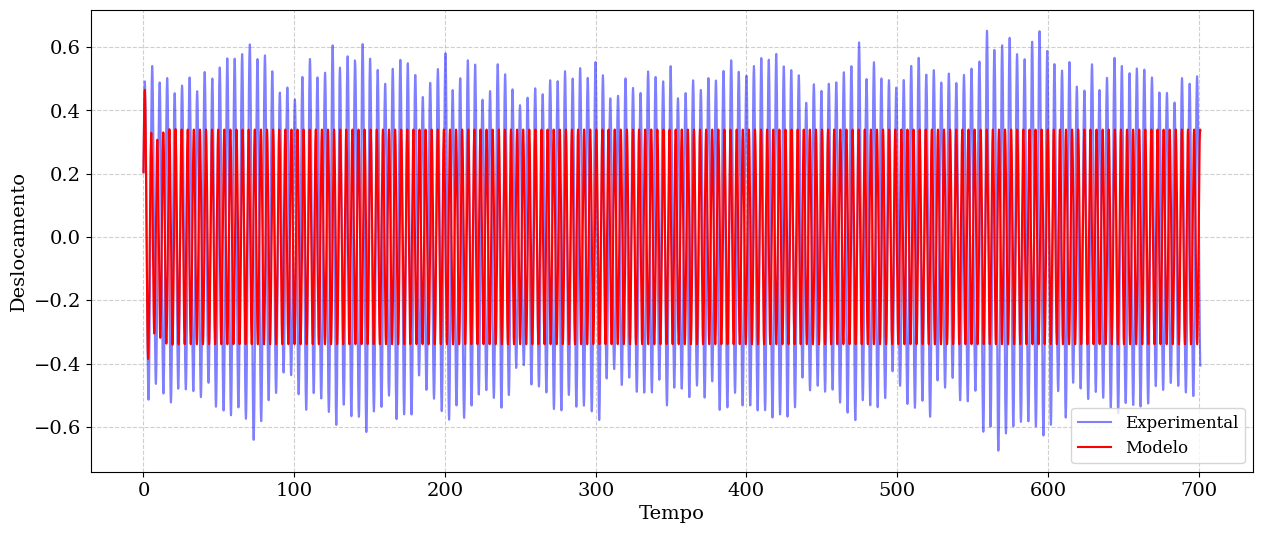

9.967837091935769


In [30]:

# Visualização para a primeira amostra
plt.figure(figsize=(15, 6))
plt.plot(T[0], Y_filtered[0], 'b-', alpha=0.5, label='Experimental')
plt.plot(T[0], Y_reconstructed[0], 'r-', label='Modelo')
plt.xlabel('Tempo')
plt.ylabel('Deslocamento')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

print(U[0])

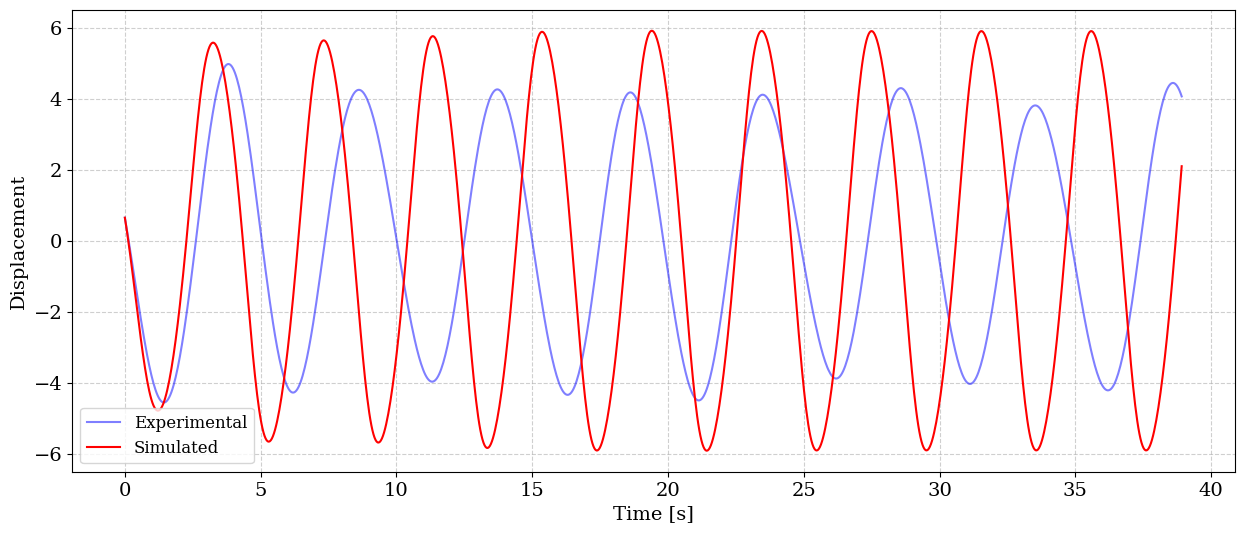

9.967837091935769


In [ ]:

# Visualização para a primeira amostra
plt.figure(figsize=(15, 6))
plt.plot(T[0,:1000], Q_filtered[0,:1000], 'b-', alpha=0.5, label='Experimental')
plt.plot(T[0,:1000], Q_reconstructed[0,:1000], 'r-', label='Simulated')
plt.xlabel('Time [s]')
plt.ylabel('Displacement')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

print(U[0])


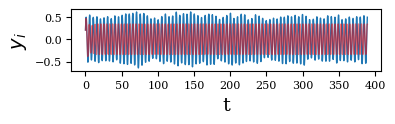

In [31]:
# prompt: change figure size

plt.figure(figsize=(4, .8)) # Change to your desired figure size
plt.plot(T[0,:10000], Y_filtered[0,:10000], linewidth=1)
plt.plot(T[0, :10000], Y_reconstructed[0, :10000], 'r-', linewidth=1, alpha=0.5)
plt.ylabel("$y_{i}$")
plt.xlabel("t")
#plt.legend("i=1")
plt.rcParams['font.family'] = "Open Sans"
plt.rcParams['font.size'] = 10
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show() # Added plt.show() to display the plot

In [32]:
Eps_poly

array([0.02346739, 0.02919857, 0.00428267, 0.00413963, 0.01452612,
       0.00927373, 0.00352366, 0.00936377, 0.00927202, 0.00512095,
       0.0068013 , 0.00458445, 0.00584089, 0.00412454, 0.00473696,
       0.02041487, 0.06325982, 0.00907243, 0.00315882, 0.00431165,
       0.03430927, 0.02872349, 0.00974573, 0.01662854, 0.01172528])

In [33]:
n_samples=25

# Arrays para resultados reconstruídos
Y_rctd_pol = np.zeros((n_samples, total_points))
Q_rctd_pol= np.zeros((n_samples, total_points))

Y_rctd_pol_rms = np.zeros((n_samples, total_points))
Q_rctd_pol_rms= np.zeros((n_samples, total_points))


for i in tqdm(range(n_samples), desc="Processando amostras"):
    Ur_val = U[i]
    T_sample = T[i, :]

    # Condições iniciais
    current_state = [
        Q_filtered[i, 0],
        Q_pd_filtered[i, 0],
        Y_filtered[i, 0],
        Y_pd_filtered[i, 0]
    ]

    current_state_rms = current_state.copy()

    # Listas para acumular resultados do bloco
    all_t2 = []
    all_y2 = []
    all_q2 = []

    all_t2_rms = []
    all_y2_rms = []
    all_q2_rms = []

    for block in range(int(np.ceil(total_points/block_size))):
        start = block * block_size
        end = min((block + 1) * block_size, total_points)
        t_block = T_sample[start:end]

        try:
            sol = solve_ivp(
                fun=lambda t, u: om_system(t, u, Eps_poly[i], A_poly[i], Ur_val),  # Usando os valores específicos da amostra
                t_span=[t_block[0], t_block[-1]],
                y0=current_state,
                t_eval=t_block,
                method=method,
                rtol=1e-5,
                atol=1e-7
            )

            sol_rms = solve_ivp(
                fun=lambda t, u: om_system(t, u, Eps_poly_rms[i], A_poly_rms[i], Ur_val),  #
                t_span=[t_block[0], t_block[-1]],
                y0=current_state_rms,
                t_eval=t_block,
                method=method,
                rtol=1e-5,
                atol=1e-7
            )

            # Armazenar resultados deste bloco
            all_t2.extend(sol.t)
            all_y2.extend(sol.y[2])
            all_q2.extend(sol.y[0])

            all_y2_rms.extend(sol_rms.y[2])
            all_q2_rms.extend(sol_rms.y[0])


            # Atualizar estado para próximo bloco
            current_state = [sol.y[k, -1] for k in range(4)]
            current_state_rms = [sol_rms.y[k, -1] for k in range(4)]

        except Exception as e:
            print(f"\nErro na amostra {i}, bloco {block}: {str(e)}")
            # Fallback: usa valores constantes
            all_t2.extend(t_block)
            all_y2.extend(np.linspace(current_state[2], current_state[2], len(t_block)))
            all_q2.extend(np.linspace(current_state[0], current_state[0], len(t_block)))

            all_y2_rms.extend(np.linspace(current_state_rms[2], current_state_rms[2], len(t_block)))
            all_q2_rms.extend(np.linspace(current_state_rms[0], current_state_rms[0], len(t_block)))


    # Interpolação final para garantir pontos uniformes
    if len(all_t2) > 1:
        y_intrp1 = interp1d(all_t2, all_y2, kind='linear', fill_value="extrapolate")
        q_intrp1 = interp1d(all_t2, all_q2, kind='linear', fill_value="extrapolate")

        y_intrp1_rms = interp1d(all_t2, all_y2_rms, kind='linear', fill_value="extrapolate")
        q_intrp1_rms = interp1d(all_t2, all_q2_rms, kind='linear', fill_value="extrapolate")

        Y_rctd_pol[i, :] = y_intrp1(T_sample)
        Q_rctd_pol[i, :] = q_intrp1(T_sample)

        Y_rctd_pol_rms[i, :] = y_intrp1_rms(T_sample)
        Q_rctd_pol_rms[i, :] = q_intrp1_rms(T_sample)

    else:
        Y_rctd_pol[i, :] = np.zeros_like(T_sample)
        Q_rctd_pol[i, :] = np.zeros_like(T_sample)

        Y_rctd_pol_rms[i, :] = np.zeros_like(T_sample)
        Q_rctd_pol_rms[i, :] = np.zeros_like(T_sample)


Processando amostras: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]


In [34]:
Y_rctd_pol_rms

array([[ 0.20404656,  0.22487816,  0.24513759, ..., -0.24763938,
        -0.22831078, -0.21353798],
       [ 0.43064519,  0.4269301 ,  0.4227197 , ..., -0.42315414,
        -0.41807635, -0.41363719],
       [ 0.07460319,  0.07868175,  0.08268438, ...,  0.33317644,
         0.33217993,  0.33111393],
       ...,
       [-0.0727335 , -0.10008527, -0.12705625, ..., -0.10458368,
        -0.0799728 , -0.06144643],
       [ 0.11610374,  0.12404075,  0.13187562, ...,  0.16153674,
         0.16740714,  0.17165046],
       [-0.60362348, -0.59549359, -0.58663737, ..., -0.14376363,
        -0.16669771, -0.18369653]])

In [35]:
total_points

18000

In [36]:
Yt = np.zeros((len(test_idxs), 18000))
Ut = np.zeros(len(test_idxs))
Tt = np.zeros((len(test_idxs), 18000))
Cy = np.zeros((len(test_idxs), 18000))


for i, idx in enumerate(test_idxs):
    if idx == 190:
        pass
    else:
      dados = np.loadtxt(prefix + str(idx), delimiter=',')
      dadosU = np.loadtxt(prefixU + str(idx))
      Tt[i, :] = dados[:, 0]  # 1ª coluna (índice 0)
      Yt[i, :] = dados[:, 1] # 2ª coluna (índice 1)
      Cy[i, :] = dados[:, 2]
      Ut[i] = np.mean(dadosU)


partes = 10
Yt_split = np.split(Yt, partes, axis=1)  # Divide ao longo das colunas

# Verificando
print(len(Yt_split))  # Saída: 10 (cada parte tem shape (30, 18000))
print(Yt_split[0].shape)

10
(12, 1800)


In [37]:
coeff_A = results['coefficients_A']
coeff_eps = results['coefficients_eps']

coeff_A_rms = results_rms['coefficients_A']
coeff_eps_rms = results_rms['coefficients_eps']

A_polyt = polynomial(Ut, *coeff_A)
Eps_polyt = polynomial(Ut, *coeff_eps)

A_polyt_rms = polynomial(Ut, *coeff_A_rms)
Eps_polyt_rms = polynomial(Ut, *coeff_eps_rms)

Eps_polyt

array([0.02804022, 0.00739388, 0.0262611 , 0.00963221, 0.01965572,
       0.00457773, 0.00978486, 0.00797678, 0.00946168, 0.00417564,
       0.00440646, 0.01031527])

In [38]:
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/A_parts.npy', A_parts)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/coeff_A.npy', coeff_A)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/eps_parts.npy', eps_parts)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/coeff_eps.npy', coeff_eps)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/A_poly.npy', A_poly)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Eps_poly.npy', Eps_poly)

np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/A_parts_rms.npy', A_parts_rms)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/coeff_A_rms.npy', coeff_A_rms)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/eps_parts_rms.npy', eps_parts_rms)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/coeff_eps_rms.npy', coeff_eps_rms)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/A_poly_rms.npy', A_poly_rms)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Eps_poly_rms.npy', Eps_poly_rms)

np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Y_filtered.npy', Y_filtered)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Y_pd_filtered.npy', Y_pd_filtered)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Y_filtered_parts.npy', Y_filtered_parts)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Y_pd_filtered_parts.npy', Y_pd_filtered_parts)

np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Q_filtered.npy', Q_filtered)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Q_pd_filtered.npy', Q_pd_filtered)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Q_filtered_parts.npy', Q_filtered_parts)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/Q_pd_filtered_parts.npy', Q_pd_filtered_parts)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/U.npy', U)
np.save('/content/drive/MyDrive/Colab Notebooks/Dissertação Caio/dados/T.npy', T)


In [39]:

n_test = len(test_idxs)


# Listas para armazenar os resultados de cada parte
Yt_pd_parts = []

# Loop sobre cada parte do Y_split (10 partes)
for part in Yt_split:  # part.shape = (30, 18000)
    n_samples, n_points = part.shape

    # Inicializa arrays temporários para esta parte
    Yt_pd_part = np.zeros((n_test, n_points))

    for i in range(n_test):
        t = Tt[i, :n_points]
        yt = part[i, :]
        fs = 1 / (t[1] - t[0])

        # Primeira derivada
        yt_pd = np.gradient(y, t)

        # Armazenamento dos resultados da parte atual
        Yt_pd_part[i, :] = y_pd

    # Adiciona os resultados desta parte às listas
    Yt_pd_parts.append(Y_pd_part)

Yt_pd = np.concatenate(Y_pd_parts, axis=1)


In [40]:
n_samples = n_test


# Arrays para resultados reconstruídos
Yt_rctd_pol_test = np.zeros((n_samples, total_points))
Qt_rctd_pol_test = np.zeros((n_samples, total_points))

Yt_rctd_pol_test_rms = np.zeros((n_samples, total_points))
Qt_rctd_pol_test_rms = np.zeros((n_samples, total_points))


for i in tqdm(range(n_samples), desc="Processando amostras"):
    Ur_val = Ut[i]
    Tt_sample = Tt[i, :]

    # Condições iniciais
    current_state = [
        0,
        0,
        Yt[i, 0],
        Yt_pd[i, 0]
    ]

    current_state_rms = current_state.copy()

    # Listas para acumular resultados do bloco
    all_t2_test = []
    all_y2_test = []
    all_q2_test = []

    all_y2_test_rms = []
    all_q2_test_rms = []

    for block in range(int(np.ceil(total_points/block_size))):
        start = block * block_size
        end = min((block + 1) * block_size, total_points)
        t_block = Tt_sample[start:end]

        try:
            sol = solve_ivp(
                fun=lambda t, u: om_system(t, u, Eps_polyt[i], A_polyt[i], Ur_val),  # Usando os valores específicos da amostra
                t_span=[t_block[0], t_block[-1]],
                y0=current_state,
                t_eval=t_block,
                method=method,
                rtol=1e-5,
                atol=1e-7
            )

            sol_rms = solve_ivp(
                fun=lambda t, u: om_system(t, u, Eps_polyt_rms[i], A_polyt_rms[i], Ur_val),  #
                t_span=[t_block[0], t_block[-1]],
                y0=current_state_rms,
                t_eval=t_block,
                method=method,
                rtol=1e-5,
                atol=1e-7)


            # Armazenar resultados deste bloco
            all_t2_test.extend(sol.t)
            all_y2_test.extend(sol.y[2])
            all_q2_test.extend(sol.y[0])

            all_y2_test_rms.extend(sol_rms.y[2])
            all_q2_test_rms.extend(sol_rms.y[0])

            # Atualizar estado para próximo bloco
            current_state = [sol.y[k, -1] for k in range(4)]
            current_state_rms = [sol_rms.y[k, -1] for k in range(4)]

        except Exception as e:
            print(f"\nErro na amostra {i}, bloco {block}: {str(e)}")
            # Fallback: usa valores constantes
            all_t2_test.extend(t_block)
            all_y2_test.extend(np.linspace(current_state[2], current_state[2], len(t_block)))
            all_q2_test.extend(np.linspace(current_state[0], current_state[0], len(t_block)))

            all_y2_test_rms.extend(np.linspace(current_state_rms[2], current_state_rms[2], len(t_block)))
            all_q2_test_rms.extend(np.linspace(current_state_rms[0], current_state_rms[0], len(t_block)))

    # Interpolação final para garantir pontos uniformes
    if len(all_t2) > 1:
        y_intrp1_test = interp1d(all_t2_test, all_y2_test, kind='linear', fill_value="extrapolate")
        q_intrp1_test = interp1d(all_t2_test, all_q2_test, kind='linear', fill_value="extrapolate")

        y_intrp1_test_rms = interp1d(all_t2_test, all_y2_test_rms, kind='linear', fill_value="extrapolate")
        q_intrp1_test_rms = interp1d(all_t2_test, all_q2_test_rms, kind='linear', fill_value="extrapolate")

        Yt_rctd_pol_test[i, :] = y_intrp1_test(T_sample)
        Qt_rctd_pol_test[i, :] = q_intrp1_test(T_sample)

        Yt_rctd_pol_test_rms[i, :] = y_intrp1_test_rms(T_sample)
        Qt_rctd_pol_test_rms[i, :] = q_intrp1_test_rms(T_sample)

    else:
        Yt_rctd_pol_test[i, :] = np.zeros_like(T_sample)
        Qt_rctd_pol_test[i, :] = np.zeros_like(T_sample)

        Yt_rctd_pol_test_rms[i, :] = np.zeros_like(T_sample)
        Qt_rctd_pol_test_rms[i, :] = np.zeros_like(T_sample)


Processando amostras: 100%|██████████| 12/12 [00:17<00:00,  1.43s/it]


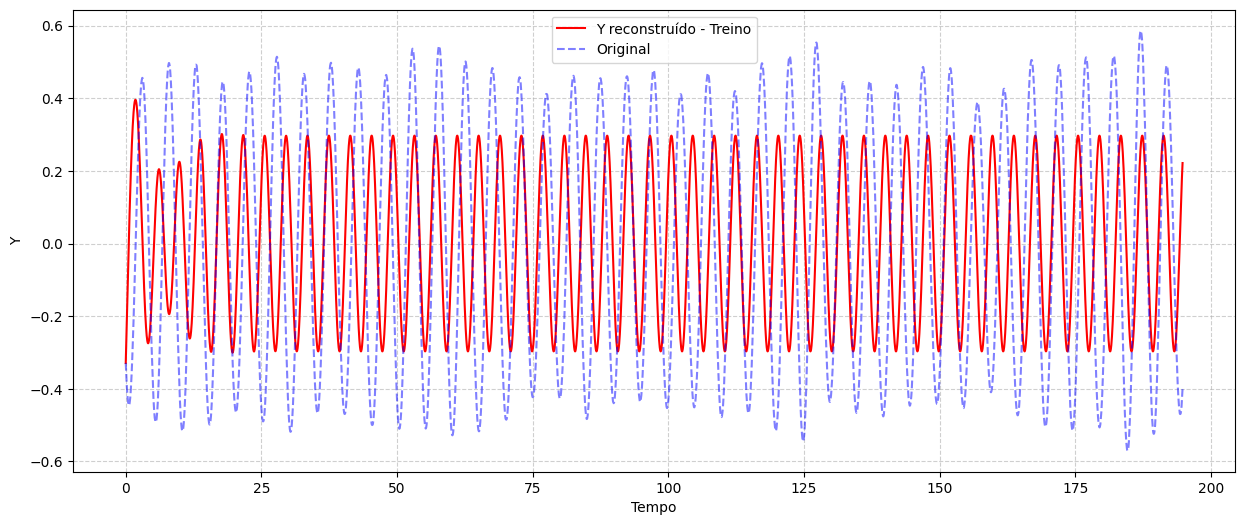

Processamento concluído com segurança!


In [41]:

# Visualização para a primeira amostra
plt.figure(figsize=(15, 6))
plt.plot(Tt[0,:5000], Yt_rctd_pol_test[0,:5000], 'r-', label='Y reconstruído - Treino')
plt.plot(Tt[0,:5000], Yt[0,:5000], 'b--', alpha=0.5, label='Original')
plt.xlabel('Tempo')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.show()

print("Processamento concluído com segurança!")

In [42]:
import numpy as np
import matplotlib.pyplot as plt

allT = np.zeros((len(all_idxs), 18000))
allY = np.zeros((len(all_idxs), 18000))
allCy = np.zeros((len(all_idxs), 18000))
allU = np.zeros(len(all_idxs))


for i, idx in enumerate(all_idxs):
    if idx == 190:
        pass
    else:
      dados = np.loadtxt(prefix + str(idx), delimiter=',')
      dadosU = np.loadtxt(prefixU + str(idx))
      allT[i, :] = dados[:, 0]  # 1ª coluna (índice 0)
      allY[i, :] = dados[:, 1] # 2ª coluna (índice 1)
      allCy[i, :] = dados[:, 2]
      allU[i] = np.mean(dadosU)

all_n = len(all_idxs)



In [43]:
A_poly

array([ 9.91821129e+00,  1.08328793e+01, -2.70380999e-03,  7.76205004e-01,
        8.70771396e+00,  7.10851011e+00, -7.20404237e-01,  7.19344466e+00,
        5.81022364e+00,  1.58898243e+00,  2.33904662e+00, -7.57775023e-01,
        1.93211293e+00,  3.42877829e-01, -5.79167086e-01,  9.53502961e+00,
        2.46449094e+00,  6.25179113e+00, -5.18872914e-01,  1.37345896e-02,
        1.87797516e+00,  1.08674784e+01,  4.24458122e+00,  1.17022907e+00,
        8.14676983e+00])

In [44]:
coeff_A

array([-4.19121483e-04,  2.47750015e-02, -6.30642139e-01,  9.01438378e+00,
       -7.89912211e+01,  4.33498259e+02, -1.45021186e+03,  2.69245435e+03,
       -2.11352764e+03])

In [45]:
allY.shape

(37, 18000)

<>:32: SyntaxWarning: invalid escape sequence '\o'
<>:32: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-39068471.py:32: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('RMS ( ${\overline{y^2}}$ )')


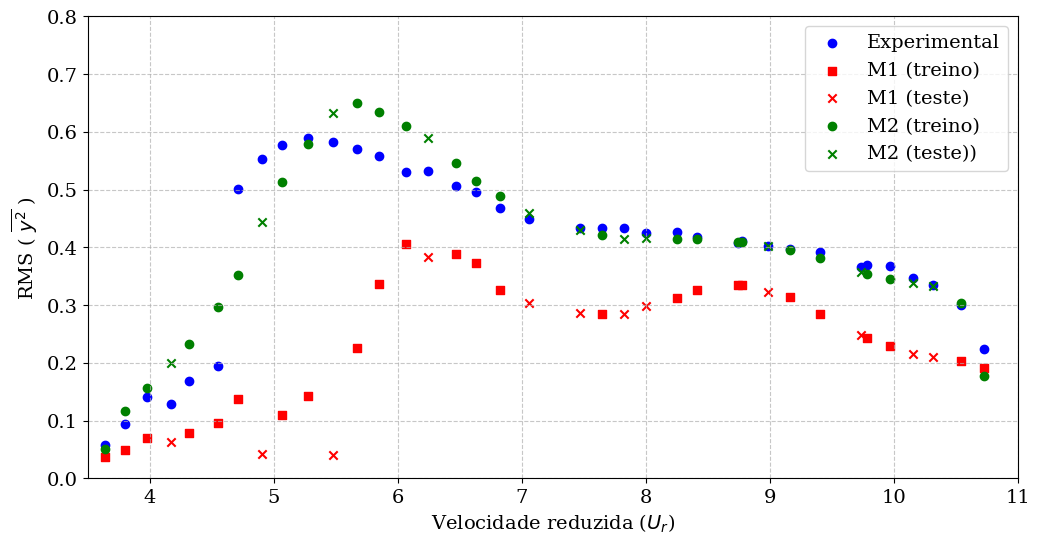

In [47]:
# Change font size globally
plt.rcParams['font.size'] = 14

# Change font family globally
plt.rcParams['font.family'] = 'serif'


# 1. RMS Experimental (Y_filtered)
rms_experimental = []
rms_experimental = np.array([np.sqrt(np.mean(allY[i, :]**2)) for i in range(all_n)])


# 2. RMS Simulado (Y_reconstructed)
rms_simulado = []
rms_simulado = np.array([np.sqrt(np.mean(Y_rctd_pol[i, :]**2)) for i in range(n_train)])
rms_test = np.array([np.sqrt(np.mean(Yt_rctd_pol_test[i, :]**2)) for i in range(n_test)])
rms_simulado_rms = np.array([np.sqrt(np.mean(Y_rctd_pol_rms[i, :]**2)) for i in range(n_train)])
rms_simulado_rms_test = np.array([np.sqrt(np.mean(Yt_rctd_pol_test_rms[i, :]**2)) for i in range(n_test)])

#rms_simulado = np.mean(rms_simulado_parts, axis=0)  # Média entre partes

# 3. Plotagem comparativa
plt.figure(figsize=(12, 6))
plt.scatter(allU, rms_experimental, color='blue', label='Experimental')
plt.scatter(U, rms_simulado, color='red', marker='s', label='M1 (treino)')
plt.scatter(Ut, rms_test, color='red', marker='x', label='M1 (teste)')
plt.scatter(U, rms_simulado_rms, color='green', label='M2 (treino)')
plt.scatter(Ut, rms_simulado_rms_test, color='green', marker='x', label='M2 (teste))')
plt.ylim(0, .8)
plt.xlim(3.5, 11)
plt.xlabel('Velocidade reduzida ($U_r$)')
plt.ylabel('RMS ( ${\overline{y^2}}$ )')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Cálculo do erro relativo médio
#erro_relativo = np.mean(np.abs(rms_experimental - rms_simulado) / rms_experimental) * 100
#print(f"Erro relativo médio entre RMS experimental e simulado: {erro_relativo:.2f}%")



In [ ]:
all_rms_simulado = np.concat((rms_simulado, rms_test))
all_rms_rms = np.concat((rms_simulado_rms, rms_simulado_rms_test))

delta_simulado = 100 * np.abs((rms_experimental - all_rms_simulado)/rms_experimental)
delta_rms = 100 * np.abs((rms_experimental - all_rms_rms)/rms_experimental)

print(allU)

print(delta_simulado)
print(delta_rms)

print(np.mean(delta_simulado))
print(np.mean(delta_rms))

print(np.std(delta_simulado))
print(np.std(delta_rms))

[ 9.96783709 10.5417739   4.32155708  6.07197201  9.40739992  8.74536951
  4.71586095  8.77859981  8.25172424  6.4713786   6.82872336  5.0719821
  6.63645884  5.85078138  5.27797839  9.78385528  3.63733152  8.41766906
  4.55405727  5.6726489   3.80389988 10.73208858  7.65189918  3.98234242
  9.16559229 10.31734539  4.17217006 10.15739634  8.00616605  9.73867632
  5.47950818  7.82510662  7.06261033  7.46944004  4.90613605  6.24248432
  8.98678225]
[37.93531931 32.54506637 53.0082837  23.51949462 27.52726767 18.06391383
 72.68049374 18.78623351 26.64933882 23.23984663 30.42410299 80.85669981
 24.65663474 39.84101632 75.81973753 33.91429494 36.81945386 21.95196247
 51.16956235 60.337355   48.2742637  14.5374802  34.3513041  50.79505635
 21.06019054 37.58214219 50.6740823  37.85422988 29.95177789 32.25233803
 92.92816472 34.16479446 32.35818504 33.90486226 92.27586714 28.1535803
 19.74009055]
[ 6.19977696  1.29565204 38.33175785 14.94753932  2.81595383  0.44014894
 29.68994466  0.38948652 

In [ ]:
initial_idxs = allU<4.7
upper_idxs = (allU>4.7) * allU<6.3
lower_idxs = allU>6.3

U_initial = allU[initial_idxs]
U_upper = allU[upper_idxs]
U_lower = allU[lower_idxs]

rms_experimental_initial = rms_experimental[initial_idxs]
rms_simulado_initial = all_rms_simulado[initial_idxs]
rms_simulado_rms_initial = all_rms_rms[initial_idxs]

rms_experimental_upper = rms_experimental[upper_idxs]
rms_simulado_upper = all_rms_simulado[upper_idxs]
rms_simulado_rms_upper = all_rms_rms[upper_idxs]

rms_experimental_lower = rms_experimental[lower_idxs]
rms_simulado_lower = all_rms_simulado[lower_idxs]
rms_simulado_rms_lower = all_rms_rms[lower_idxs]

delta_simulado_initial = delta_simulado[initial_idxs]
delta_rms_initial = delta_rms[initial_idxs]

delta_simulado_upper = delta_simulado[upper_idxs]
delta_rms_upper = delta_rms[upper_idxs]

delta_simulado_lower = delta_simulado[lower_idxs]
delta_rms_lower = delta_rms[lower_idxs]

print("\n\n\nSimulado:")
print("Mean")
print("Initial: ", np.mean(delta_simulado_initial))
print("Upper: ", np.mean(delta_simulado_upper))
print("Lower: ", np.mean(delta_simulado_lower))
print("Total: ", np.mean(delta_simulado))
print("\nSTD")
print("Initial: ", np.std(delta_simulado_initial))
print("Upper: ", np.std(delta_simulado_upper))
print("Lower: ", np.std(delta_simulado_lower))
print("Total: ", np.std(delta_simulado))

print("\n\n\nRMS:")
print("Mean")
print("Initial: ", np.mean(delta_rms_initial))
print("Upper: ", np.mean(delta_rms_upper))
print("Lower: ", np.mean(delta_rms_lower))
print("Total: ", np.mean(delta_rms))
print("\nSTD")
print("Initial: ", np.std(delta_rms_initial))
print("Upper: ", np.std(delta_rms_upper))
print("Lower: ", np.std(delta_rms_lower))
print("Total: ", np.std(delta_rms))




Simulado:
Mean
Initial:  48.45678370741172
Upper:  57.14354076242652
Lower:  28.33869892810877
Total:  40.016337509588936

STD
Initial:  5.383926876773955
Upper:  20.935745193012654
Lower:  6.923048120529725
Total:  20.154274048339424



RMS:
Mean
Initial:  32.33491841333859
Upper:  21.218247046986782
Lower:  3.458949692717995
Total:  10.658664836340478

STD
Initial:  18.03390840397507
Upper:  15.631330708746212
Lower:  4.384394357496892
Total:  13.656938645852774


In [ ]:
# Calculate mean and standard deviation for each category
mean_delta_simulado_initial = np.mean(delta_simulado_initial)
std_delta_simulado_initial = np.std(delta_simulado_initial)

mean_delta_simulado_upper = np.mean(delta_simulado_upper)
std_delta_simulado_upper = np.std(delta_simulado_upper)

mean_delta_simulado_lower = np.mean(delta_simulado_lower)
std_delta_simulado_lower = np.std(delta_simulado_lower)

mean_delta_simulado_total = np.mean(delta_simulado)
std_delta_simulado_total = np.std(delta_simulado)

mean_delta_rms_initial = np.mean(delta_rms_initial)
std_delta_rms_initial = np.std(delta_rms_initial)

mean_delta_rms_upper = np.mean(delta_rms_upper)
std_delta_rms_upper = np.std(delta_rms_upper)

mean_delta_rms_lower = np.mean(delta_rms_lower)
std_delta_rms_lower = np.std(delta_rms_lower)

mean_delta_rms_total = np.mean(delta_rms)
std_delta_rms_total = np.std(delta_rms)

# Create the DataFrame
data = {
    'Category': ['Initial', 'Upper', 'Lower', 'Total'],
    'Mean(delta) Simulado ± Std(delta) Simulado': [
        f'{mean_delta_simulado_initial:.2f} ± {std_delta_simulado_initial:.2f}',
        f'{mean_delta_simulado_upper:.2f} ± {std_delta_simulado_upper:.2f}',
        f'{mean_delta_simulado_lower:.2f} ± {std_delta_simulado_lower:.2f}',
        f'{mean_delta_simulado_total:.2f} ± {std_delta_simulado_total:.2f}'
    ],
    'Mean(delta) RMS ± Std(delta) RMS': [
        f'{mean_delta_rms_initial:.2f} ± {std_delta_rms_initial:.2f}',
        f'{mean_delta_rms_upper:.2f} ± {std_delta_rms_upper:.2f}',
        f'{mean_delta_rms_lower:.2f} ± {std_delta_rms_lower:.2f}',
        f'{mean_delta_rms_total:.2f} ± {std_delta_rms_total:.2f}'
    ]
}

df_summary = pd.DataFrame(data)

# Print the table
#print(df_summary.to_string(index=False))

df_summary

,Category,Mean(delta) Simulado ± Std(delta) Simulado,Mean(delta) RMS ± Std(delta) RMS
0,Initial,48.46 ± 5.38,32.33 ± 18.03
1,Upper,57.14 ± 20.94,21.22 ± 15.63
2,Lower,28.34 ± 6.92,3.46 ± 4.38
3,Total,40.02 ± 20.15,10.66 ± 13.66
